# Deep Learning 
This program uses mnist data to take a look at how deep learning is structured. 

## Set the Dataset
First, we need to import some packages. Since this program uses tensorflow as its algorithm for deep learning, it needs to import tensorflow packages. Also, import numpy package because we will use it for allocate random seeds. We will also import matplotlib in the last cell because we need to visualize the result. 

And then, we divide the data into train sets and validation sets. We have 100000 data in the mnist dataset, and so we will divide into exactly half of it: 50000 for train sets, 50000 for validation sets. Since my computer won't handle the huge amount of data, I will only use 784 each. 

In [1]:
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
np.random.seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

## Add Layers
Next step is to add the layers. The most important part of deep learning comes to this place. The number of units, activation functions, and the number of input neurons are effective on the accuracy of the program. For this program, it has three layers: one input layer with 28 x 28 inputs, and two layers with 128 and 10 units each. The last layer has the softmax activation function in order to normalize the input.

In [2]:
model = Sequential()
model.add(Dense(units=512, input_dim=28*28, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

## Compile the Model
Then, we compile the model. In this step, we specify several functions to calculate the accuracy or loss and set optimizer functions. Since our data type is not binary, we calculate the loss by categorical crossentropy. sgd stands for Stochastic gradient descent. It calculates the momentum and the learning rate decay in order to slide down the fitting curve faster. 

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

## Fit the Model
Now, it's time to train the model! "epochs" is to indicate the number of repetition of the fitting. "batch_size" is the number of data sets for one validation check. Bring the train data sets and validation data sets, and run the code. It will take a lot of time to finish the process if the numbers were high, but in this case, the numbers are relatively small than other programs out there. 

In [6]:
hist = model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_data=(X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 189us/sample - loss: 1.0580 - accuracy: 0.7487 - val_loss: 0.4835 - val_accuracy: 0.8883
Epoch 2/20
50000/50000 [==============================] - 9s 173us/sample - loss: 0.4381 - accuracy: 0.8861 - val_loss: 0.3491 - val_accuracy: 0.9069
Epoch 3/20
50000/50000 [==============================] - 8s 168us/sample - loss: 0.3521 - accuracy: 0.9034 - val_loss: 0.3014 - val_accuracy: 0.9182
Epoch 4/20
50000/50000 [==============================] - 8s 167us/sample - loss: 0.3118 - accuracy: 0.9133 - val_loss: 0.2728 - val_accuracy: 0.9252
Epoch 5/20
50000/50000 [==============================] - 8s 167us/sample - loss: 0.2851 - accuracy: 0.9200 - val_loss: 0.2550 - val_accuracy: 0.9288
Epoch 6/20
50000/50000 [==============================] - 9s 172us/sample - loss: 0.2646 - accuracy: 0.9250 - val_loss: 0.2386 - val_accuracy: 0.9339
Epoch 7/20
50000/50000 [==========================

## Visualize the Result
We can see the numbers above, but it's way much better to see the results in a graph. Import the matplotlib package to visualize the result. The graph will show the line of train and validation accuracy and train and validation loss. If the lines for loss and accuracy of train set and validation set overlap each other, the the model is well fit. If the loss increases, then the model is overfit. We have to tweak the digits a little bit. This model will show a pretty good result. 

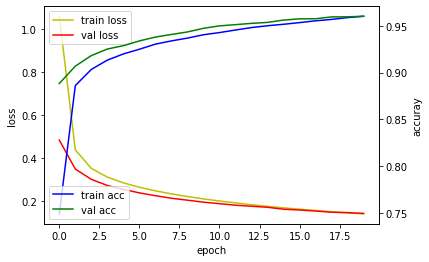

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()